# Lab - YOLOv4-Tiny - Darknet Training with 1st Floor Mudd Videos
## E6692 Spring 2022

After the Darknet code has been compiled on GCP, we can begin training of the YOLOv4-Tiny model on the 1st Floor Mudd dataset. This notebook is located inside the darknet directory to simplify the configuration paths. The 1st floor Mudd dataset was created from video recorded of the 120th and Amsterdam intersection. 

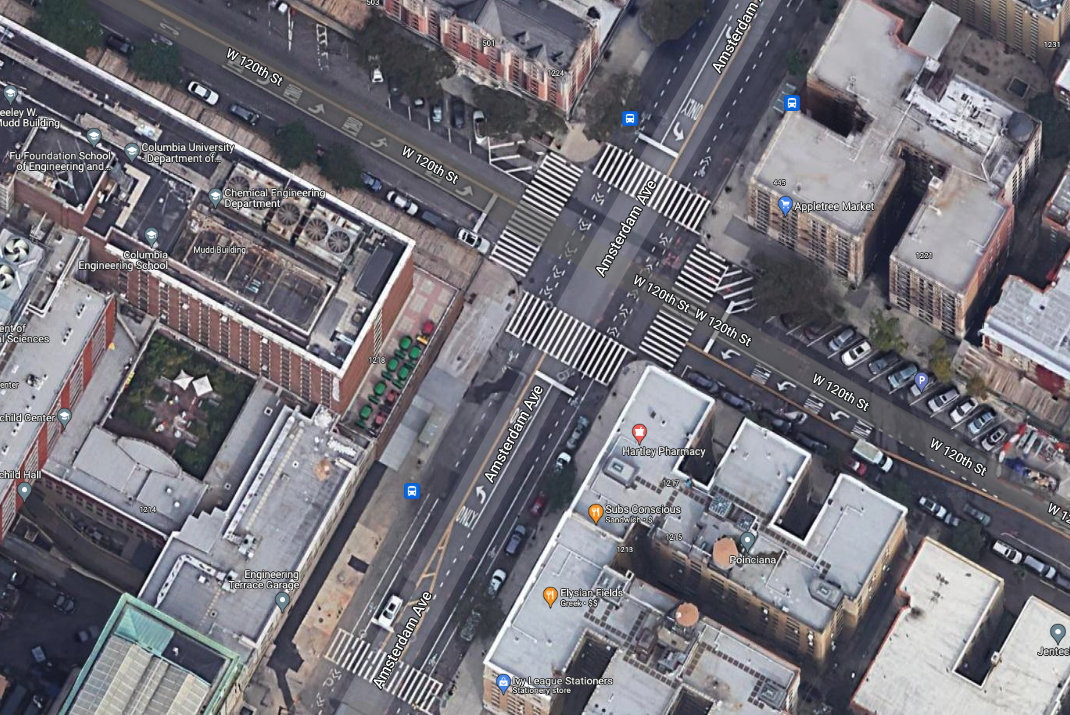

It has 9 classes of labeled objects: people, faces, cars, buses, trucks, license plates, bicycles, umbrellas, and strollers. For this assignment we care only about 2 classes: people and vehicles, where vehicles is an aggregated class of cars, buses, and trucks. The dataset is stored as two files in the Google Drive. You need to download `Mudd1stFloorVideos_Summer2021.zip` and `Mudd1stFloorAnnotations_Summer2021.zip` which contains the video files and the ground truth annotations. Use [gcloud scp](https://cloud.google.com/sdk/gcloud/reference/compute/scp) to transfer these zip files to the GCP instance (or transfer them directly from google drive to the VM) and then use the `unzip` command to decompress them as `videos` and `labels`.

In [ ]:
# install OpenCV python
!pip install opencv-python

In [ ]:
import cv2
import os, sys
sys.path.insert(1, '../')

from darknet_utils.utils import *
from darknet_utils.load_annotations import *
from darknet_utils.make_dataset import make_darknet_dataset, inspect_darknet_dataset
from darknet_utils.train_darknet import train_darknet

darknet_dataset_path = './darknet_dataset_config/person-vehicle-yolov4-tiny.cfg'
class_groups = {'vehicle' : ['car', 'bus', 'truck']}

%load_ext autoreload
%autoreload 2

## Generate darknet dataset

The 1st Floor Mudd dataset is not in the format Darknet expects. You will need to convert it to the Darknet format before training. Luckily, we have provided most of the conversion code for you. However, there are some configuration TODO's that you need to complete. 

1. TODO: Create the file **darknet/data_config/person-vehicle-yolov4-tiny.data**. This file defines the number of classes, paths to text files containing the paths to the training and validation images (in image_paths), the path to the text file defining the class names, and the path to store the trained weights. It should look like this:

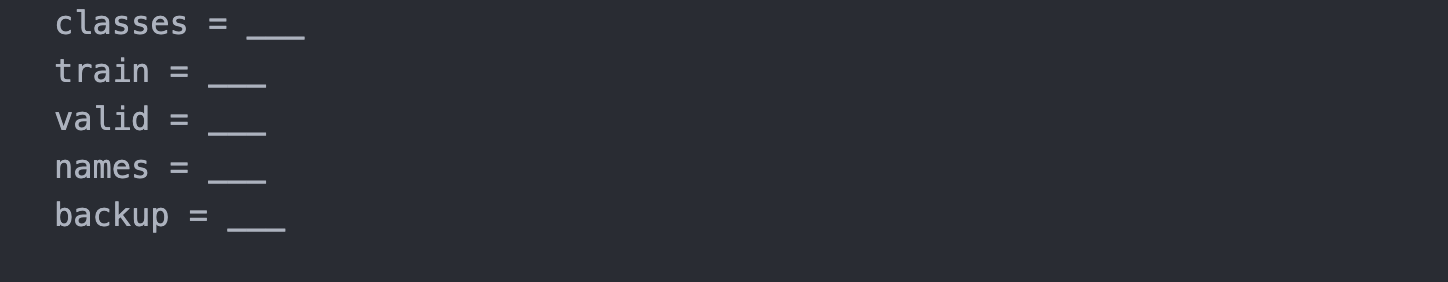

2. TODO: Complete the file **darknet/darknet_dataset_config/person-vehicle-yolov4-tiny.cfg**. You need to specify the path to person-vehicle-yolov4-tiny.data `obj_data_filename`, the path to store the training images `train_path`, the path to store the validation images `val_path`, the path to the video files `videos_path`, and the path to the labels `labels_path`. 


 Darknet expects a .data file (which you just created) that specifies paths to training and validation images and labels. The function **make_darknet_dataset()** in **darknet_utils/make_dataset.py** generates these images and labels in the format darknet expects from the CVAT style 1st Floor Mudd dataset. Darknet expects there to be one label file for each image, where the labels are formatted one line per object as `<object-class> <x_center> <y_center> <width> <height>` in relative coordinates (0-1). The Mudd dataset is in a json style format with coordinates `x_topleft y_topleft x_bottomright y_bottomright` in absolute coordinates (pixels). 
 
**TODO:** Complete **make_darknet_dataset()** to format the dataset in the Darknet style. Coordinates are read object by object from the array `coords` and written to the string `coords_string`. Use the variables `frame_width` and `frame_height`.

**TODO:** Generate the 1st Floor Mudd Darknet dataset. You may want to specify the `max_videos` and `max_frames` variables in the dataset config file for debugging.

In [ ]:
# TODO: generate the darknet dataset with make_darknet_dataset() 



## Check Dataset size and Correctness

In [ ]:
print("Train size: ", get_dataset_size('./data/train/person-vehicle-yolov4-tiny'))
print("Validation size: ", get_dataset_size('./data/validation/person-vehicle-yolov4-tiny'))

Now we need to visibly inspect the Darknet dataset for correctness. If labels are not accurate, the model cannot train effectively. 

**TODO:** Complete the function **inspect_darknet_dataset()** in **darknet_utils/make_dataset.py**. 

In [ ]:
# TODO: Use inspect_darknet_dataset() to visually verify that the training and validation labels are accurate



In [ ]:
# Run this cell to query the available GPU memory
!nvidia-smi --query-gpu=memory.free --format=csv

## Define Darknet Model

Darknet models are defined by parsing configuration files. The config files contain the layers, order of layers, layer parameters, training parameters, loss function specifications, etc. Using configuration files to define models makes it easy to modify and do version control for slight variations of the same model. 

**TODO:** Complete the TODO's in the YOLOv4-Tiny configuration file **yolov4-tiny-person-vehicle.cfg**. You're welcome to experiment with any of the other configuration parameters, but be careful not to modify the structure of the model. If you do modify the structure you will not be able to load the pretrained weights. 

## Begin Darknet training

Rather than training from scratch, we can often times acheive better results by utilizing transfer learning, or starting from some pretrained weights. In **weights** there is a file `yolov4-tiny.conv.29` that contains YOLOv4-Tiny COCO pretrained weights. These weights are different from the ones we used to do webcam inference - they only have trained values for the first 29 layers of the model, rather than having trained values for all of the layers. 

Why would we start custom training with pretrained weights for only the first 29 layers?

**TODO:** Your answer here. If you're feeling curious, you can experiment with using `yolov4-tiny.weights`

In the cell below, define the data config path, the model config path, and the initial weights path, then use **darknet_utils.train_darknet()** to start the darknet training. If you're having trouble using the python command wrapper, you can use the terminal command `darknet detector train <data_cfg> <model_cfg> <intitial_weights> -dont_show -map &` where `-dont_show` disables the image display and `-map` specifies validation mAP calculation and plotting. Every 100 iterations (mini-batch passes) the training loss and validation mAP plot will be generated as "chart.png" in the darknet directory.

#### In terms of the training loss and validation mAP plot, when should you stop training the model?

**TODO:** Your answer here.

In [ ]:
# TODO: start custom training of YOLOv4-Tiny on the 1st Floor Mudd dataset
